<a href="https://colab.research.google.com/github/amanatid/Python_Tutorial_Torch/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Create a class model that inherits nn.Module
class Model(nn.Module):
  # Input Layer(4 features of the flower)  -->
  # Hidden Layer 1 (number of neurons) -->
  # H2(n)(hiden layer 2 of n number of neurons) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__() #instaniate our  nn.Model
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

  def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x


In [ ]:
#pickup a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#Change Columns Strings to Integers
my_df['variety']= my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [ ]:
#Train and split! X , Y
X= my_df.drop('variety', axis=1)
y= my_df['variety']


In [ ]:
#Convert these to numpy arrays
X= X.values
y= y.values

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
#Train Test Split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [ ]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#Converty labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#set the criterion of model to measure the error, how far our predictions are from the data)
criterion = nn.CrossEntropyLoss()
#Choose Adam optimizer, lr = learning rate (if error doesn't go down after bunch of iterations(epochs), lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
#Train our Model
#Epochs?(one run through all the training data)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #measure loss/error gonna  be high at first
  loss = criterion(y_pred,y_train) #predicted values  vs the  y_train

  #keep track of our losess
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss {loss}')
  #do some back propagation: take the error forward propagation and feed it back
  #thru the network and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss 0.017991583794355392
Epoch: 10 and loss 0.017581406980752945
Epoch: 20 and loss 0.017188003286719322
Epoch: 30 and loss 0.01680995337665081
Epoch: 40 and loss 0.016445940360426903
Epoch: 50 and loss 0.01609533280134201
Epoch: 60 and loss 0.01575668342411518
Epoch: 70 and loss 0.015429061837494373
Epoch: 80 and loss 0.015111792832612991
Epoch: 90 and loss 0.014803951606154442


Text(0.5, 0, 'Epoch')

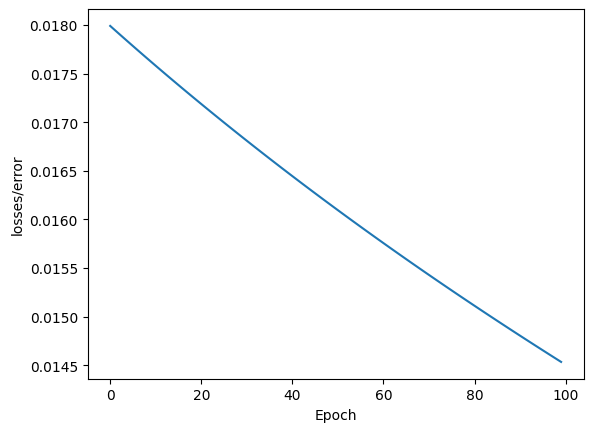

In [ ]:
#Graph it out
plt.plot( range(epochs), losses)
plt.ylabel('losses/error')
plt.xlabel('Epoch')


In [ ]:
with torch.no_grad(): # Basically turn off back propagation
      y_eval = model.forward(X_test) # X_test are our features from our test set, y_eval will be
      loss = criterion(y_eval, y_test) # Find the loss of error

In [ ]:
loss

tensor(0.1970)

In [ ]:
correct =0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
           x = 'Setosa'
        elif y_test[i]==1:
           x = 'VersiColor'
        else:
           x = 'Virginica'
       # will tell us what type of  flower class our network think it is
        print(f'{i+1}.)  {str(y_val)} \t  {str(y_test[i])}  \t  {y_val.argmax().item()}'  )

       # Correct or not
        if y_val.argmax().item() == y_test[i]:
           correct+=1

print(f'We got {correct} correct!')

1.)  tensor([-2.9206,  0.8189,  6.4617]) 	  tensor(2)  	  2
2.)  tensor([-3.5538,  0.0727,  8.5780]) 	  tensor(2)  	  2
3.)  tensor([-3.8663, -0.1295,  9.5646]) 	  tensor(2)  	  2
4.)  tensor([ 0.3641,  6.6372, -3.8690]) 	  tensor(1)  	  1
5.)  tensor([-3.6150,  0.0342,  8.7710]) 	  tensor(2)  	  2
6.)  tensor([ 0.9649,  8.6799, -5.5638]) 	  tensor(1)  	  1
7.)  tensor([-2.4435,  1.8113,  4.8073]) 	  tensor(2)  	  2
8.)  tensor([ 0.4277,  6.8710, -4.0706]) 	  tensor(1)  	  1
9.)  tensor([-3.1980,  0.6516,  7.3332]) 	  tensor(2)  	  2
10.)  tensor([-3.7347, -0.0462,  9.1497]) 	  tensor(2)  	  2
11.)  tensor([-2.1339,  2.3535,  3.8355]) 	  tensor(2)  	  2
12.)  tensor([ 19.3906,   8.6734, -23.7652]) 	  tensor(0)  	  0
13.)  tensor([ 17.6880,   7.9448, -21.6715]) 	  tensor(0)  	  0
14.)  tensor([ 1.0529,  8.9448, -5.7730]) 	  tensor(1)  	  1
15.)  tensor([ 15.9400,   8.8282, -20.4383]) 	  tensor(0)  	  0
16.)  tensor([-1.5623,  3.3025,  2.0755]) 	  tensor(2)  	  1
17.)  tensor([ 17.3329, 